<a href="https://colab.research.google.com/github/ChinthakindhiNishitha/RoadSafe-Analytics/blob/main/geospatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

file_path ="/content/drive/MyDrive/US_Accidents_March23.csv"
cols = ['City', 'State', 'Weather_Condition', 'Start_Time','Start_Lat','Start_Lng', 'End_Time', 'Severity', 'Temperature(F)', 'Visibility(mi)']
df = pd.read_csv(file_path, usecols=cols, nrows=100000)

print(df.head())
print(df.info())

   Severity           Start_Time             End_Time  Start_Lat  Start_Lng  \
0         3  2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147 -84.058723   
1         2  2016-02-08 06:07:59  2016-02-08 06:37:59  39.928059 -82.831184   
2         2  2016-02-08 06:49:27  2016-02-08 07:19:27  39.063148 -84.032608   
3         3  2016-02-08 07:23:34  2016-02-08 07:53:34  39.747753 -84.205582   
4         2  2016-02-08 07:39:07  2016-02-08 08:09:07  39.627781 -84.188354   

           City State  Temperature(F)  Visibility(mi) Weather_Condition  
0        Dayton    OH            36.9            10.0        Light Rain  
1  Reynoldsburg    OH            37.9            10.0        Light Rain  
2  Williamsburg    OH            36.0            10.0          Overcast  
3        Dayton    OH            35.1             9.0     Mostly Cloudy  
4        Dayton    OH            36.0             6.0     Mostly Cloudy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data

In [7]:
df[['Start_Lat','Start_Lng' ]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Start_Lat  100000 non-null  float64
 1   Start_Lng  100000 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


In [8]:
# Drop rows with missing geolocation data
df_geo = df.dropna(subset=['Start_Lat','Start_Lng'])

# Optional: Remove duplicate geolocations if needed
df_geo = df_geo.drop_duplicates(subset=['Start_Lat','Start_Lng'])

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns

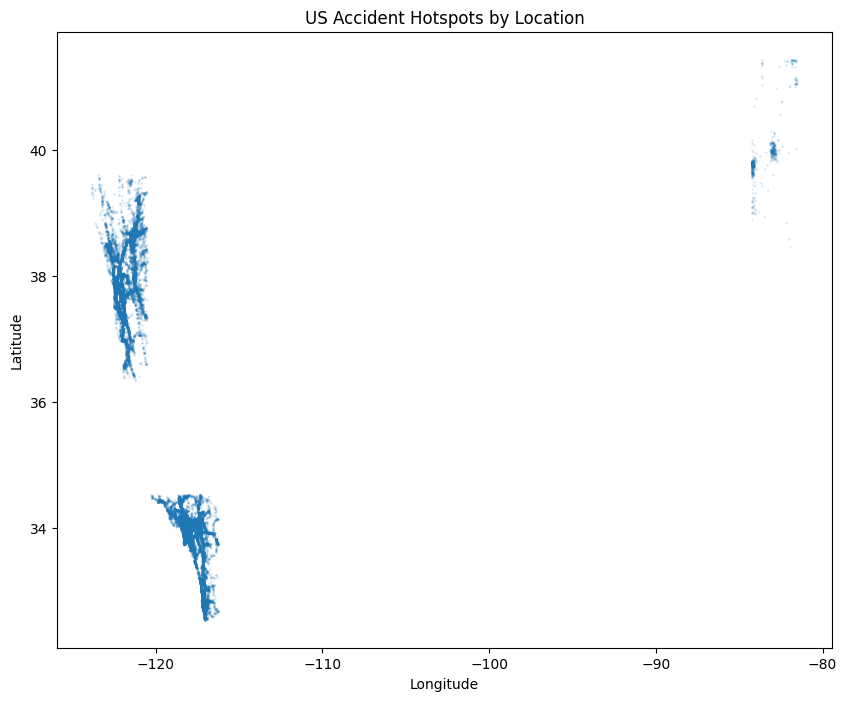

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(df_geo['Start_Lng'],df_geo['Start_Lat'], alpha=0.1, s=1)
plt.title("US Accident Hotspots by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

/tmp/ipython-input-2947758054.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


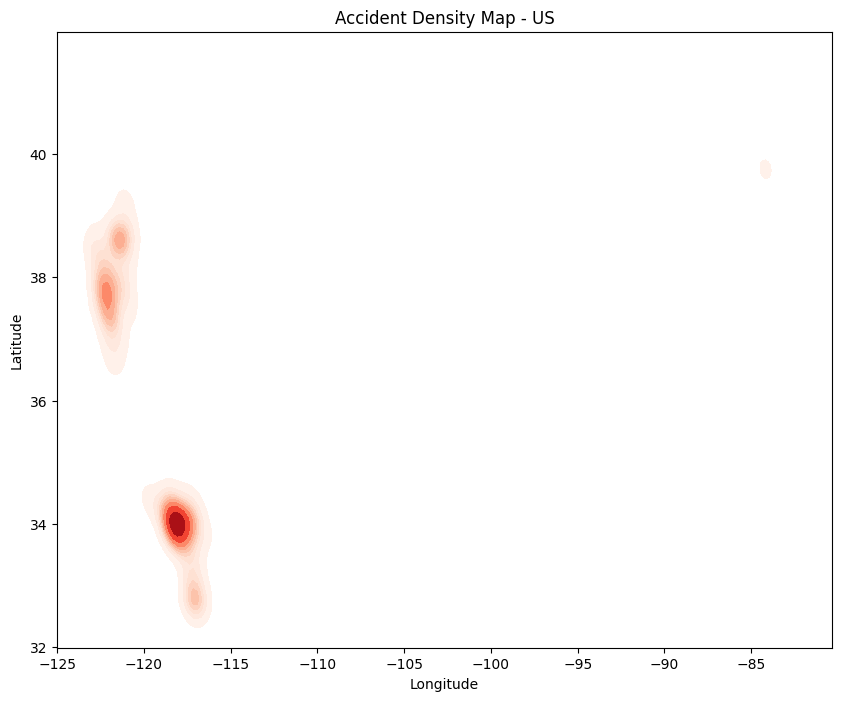

In [11]:
plt.figure(figsize=(10,8))
sns.kdeplot(
    x=df_geo['Start_Lng'],
    y=df_geo['Start_Lat'],
    cmap="Reds", shade=True,
    bw_adjust=0.5
)
plt.title("Accident Density Map - US")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()